Pradyumna Yadav (191010228)
Priyansh Sharma (191010230)
Sakshi Verma (191010239)

Kaggle dataset: Deepfake detection dataset: https://www.kaggle.com/c/deepfake-detection-challenge/data?select=train_sample_videos

# Mounting drive to access dataset


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
!apt-get install python3.8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-minimal
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 5,071 kB of archives.
After this operation, 18.8 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.18-1+jammy1 [794 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.18-1+jammy1 [2,024 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-stdlib amd64 3.8.18-1+jammy1 [1,815 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu ja

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
!pip install virtualenv



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.2 MB/s eta 0:00:00


In [ ]:
!virtualenv -p /usr/bin/python3.8 myenv


created virtual environment CPython3.8.18.final.0-64 in 1699ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.1.0, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source myenv/bin/activate


In [ ]:
!pip install tensorflow==2.4.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
import zipfile

# Define the path to the zip file
zip_file_path = '/content/gdrive/MyDrive/dataset.zip'

# Define the directory where you want to extract the contents
extract_dir = '/content/gdrive/MyDrive'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_dir)

# Optionally, you can print a message to confirm the extraction
print("Extraction complete.")


Extraction complete.


# Importing Libraries

In [ ]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Pre-processing

In [ ]:
input_shape = (128, 128, 3)
data_dir = '/content/gdrive/MyDrive/dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(0)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(1)

X_pkl = '/content/gdrive/MyDrive/dataset/X_pkl.pkl'
Y_pkl = '/content/gdrive/MyDrive/dataset/Y_pkl.pkl'
with open(X_pkl,'wb') as f:
  pickle.dump(X,f)

with open(Y_pkl,'wb') as f:
  pickle.dump(Y,f)

In [ ]:
input_shape = (128, 128, 3)
X_pkl = '/content/gdrive/MyDrive/dataset/X_pkl.pkl'
Y_pkl = '/content/gdrive/MyDrive/dataset/Y_pkl.pkl'

X = pickle.load(open(X_pkl,'rb'))
Y = pickle.load(open(Y_pkl,'rb'))

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 14715714 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 14715714 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
EPOCHS = 20
BATCH_SIZE = 100
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
30/30 [==============================] - 68s 1s/step - loss: 0.4891 - accuracy: 0.8001 - val_loss: 0.4754 - val_accuracy: 0.7864
Epoch 2/20
30/30 [==============================] - 14s 481ms/step - loss: 0.4065 - accuracy: 0.8241 - val_loss: 0.3594 - val_accuracy: 0.8358
Epoch 3/20
30/30 [==============================] - 14s 463ms/step - loss: 0.3221 - accuracy: 0.8685 - val_loss: 0.3100 - val_accuracy: 0.8598
Epoch 4/20
30/30 [==============================] - 14s 468ms/step - loss: 0.2610 - accuracy: 0.8982 - val_loss: 0.2644 - val_accuracy: 0.9239
Epoch 5/20
30/30 [==============================] - 14s 466ms/step - loss: 0.2036 - accuracy: 0.9222 - val_loss: 0.2226 - val_accuracy: 0.9146
Epoch 6/20
30/30 [==============================] - 14s 467ms/step - loss: 0.1676 - accuracy: 0.9399 - val_loss: 0.2102 - val_accuracy: 0.9159
Epoch 7/20
30/30 [==============================] - 14s 459ms/step - loss: 0.1460 - accuracy: 0.9439 - val_loss: 0.1747 - val_accuracy: 0.9466
Ep

# Plotting metrics

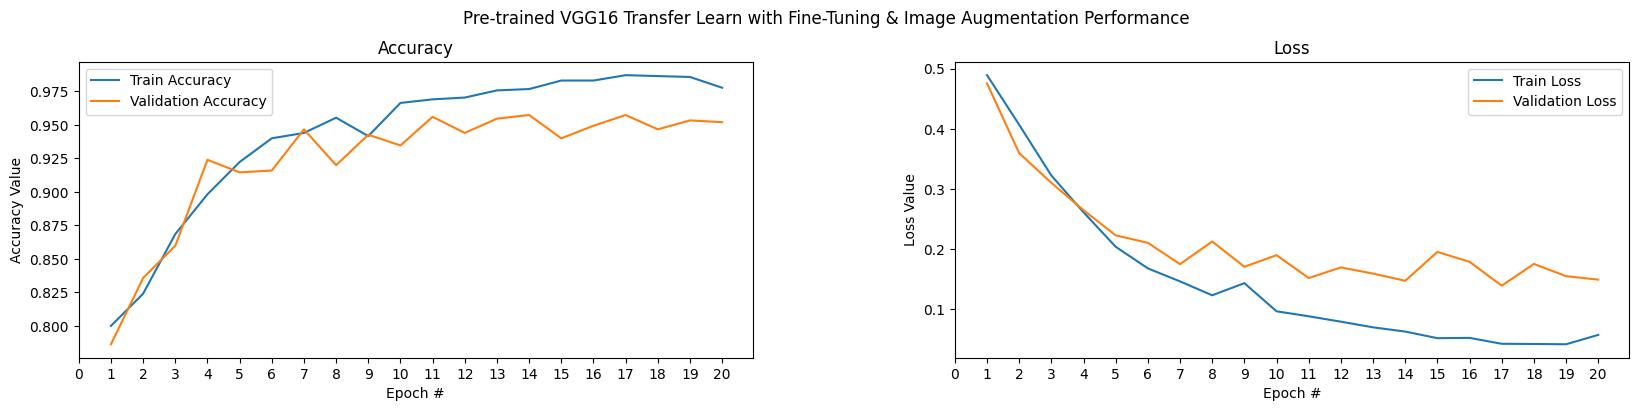

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained VGG16 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

118/118 [==============================] - 9s 48ms/step
True positive =  716
False positive =  43
False negative =  28
True negative =  2958




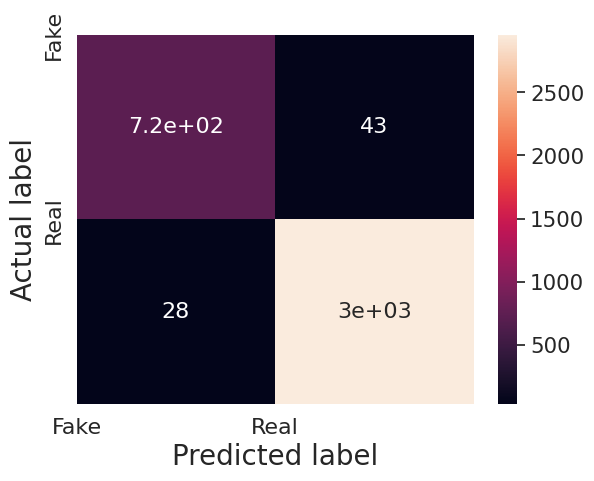

In [ ]:
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    """
    Plots confusion matrix

    This function gives the rconfusion matrix as output in form of heatmap

    Returns
    -------
    None
    Arguments
    ----------
    y_true: list
    y_pred: list

    """
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
print_confusion_matrix(Y_val_org, y_pred_classes)

# Saving model

In [ ]:
model.save('/content/gdrive/MyDrive/dataset/deepfake-detection-model-vgg.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import dlib
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
test_videos = '/content/gdrive/MyDrive/dataset/video'
os.listdir(test_videos)

['afoovlsmtx.mp4',
 'bbhtdfuqxq.mp4',
 'chtapglbcj.mp4',
 'cpjxareypw.mp4',
 'dkzvdrzcnr.mp4',
 'drcyabprvt.mp4',
 'dqqtjcryjv.mp4',
 'edyncaijwx.mp4']

In [ ]:
video_name = input("Enter a video name: ")
video = video_name.split('.')[0]
extension = video_name.split('.')[1]

video_name = video + '.' + extension

Enter a video name: bbhtdfuqxq.mp4


In [ ]:
def select_model(model_name):
    if model_name == 'InceptionResnetv2':
        detection_model = load_model('/content/gdrive/MyDrive/dataset/deepfake-detection-model-efficent.h5')
    elif model_name == 'VGG16':
        detection_model = load_model('/content/gdrive/MyDrive/deepfake-detection-model-vgg.h5')
    else:
        return "An Error Occurred!!!"
    return detection_model

model = input("Select a model: \n\n1)InceptionResnetv2   2)VGG16 \n\n")
if model == '1':
    model = 'InceptionResnetv2'
elif model == '2':
    model = 'VGG16'
else:
    print("Enter correct option")

print("\n\nmodel: {} selected".format(model))

Select a model: 

1)InceptionResnetv2   2)VGG16 

2


model: VGG16 selected


1/1 [==============================] - 0s 196ms/step
writing frame : 1
1/1 [==============================] - 0s 26ms/step
writing frame : 2
1/1 [==============================] - 0s 32ms/step
writing frame : 3
1/1 [==============================] - 0s 29ms/step
writing frame : 4
1/1 [==============================] - 0s 29ms/step
writing frame : 5
1/1 [==============================] - 0s 18ms/step
writing frame : 6
1/1 [==============================] - 0s 18ms/step
writing frame : 7
1/1 [==============================] - 0s 17ms/step
writing frame : 8
1/1 [==============================] - 0s 17ms/step
writing frame : 9
1/1 [==============================] - 0s 25ms/step
writing frame : 10
1/1 [==============================] - 0s 19ms/step
writing frame : 11
1/1 [==============================] - 0s 20ms/step
writing frame : 12
1/1 [==============================] - 0s 17ms/step
writing frame : 13
1/1 [==============================] - 0s 17ms/step
writing frame : 14
1/1 [=========

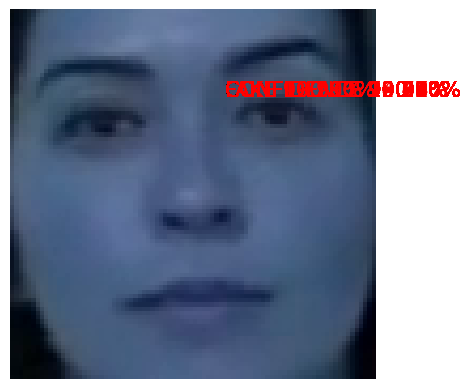

In [ ]:
def prediction(model, video_path, folder_name):
    result_path = '/content/gdrive/MyDrive/miniproject/' + folder_name
    if os.path.exists(result_path):
        shutil.rmtree(result_path)
        os.makedirs(result_path)
    else:
        os.makedirs(result_path)
    input_shape = (128, 128, 3)
    pr_data = []
    detector = dlib.get_frontal_face_detector()
    cap = cv2.VideoCapture(video_path)
    frameRate = cap.get(5)
    count = 0
    while cap.isOpened():

        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        count += 1
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = tf.keras.utils.img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                prediction_result = model.predict(data)
                confidence = np.max(prediction_result) * 100
                if np.argmax(prediction_result) == 1:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50, 20, 'FAKE %.2f%%' % confidence, fontsize=15, c='r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
                elif np.argmax(prediction_result) == 0:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50, 20, 'REAL %.2f%%' % confidence, fontsize=15, c='r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
        else:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = tf.keras.utils.img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                prediction_result = model.predict(data)
                confidence = np.max(prediction_result) * 100
                plt.imshow(crop_img)
                plt.axis('off')
                plt.text(50, 20, 'CONFIDENCE %.2f%%' % confidence, fontsize=15, c='r')
                # plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                print("writing frame : %d" % count)

mod = select_model(model)
prediction(mod, '/content/gdrive/MyDrive/dataset/video/' + video_name, video)


# def prediction(model):
#     input_shape = (128, 128, 3)
#     pr_data = []
#     detector = dlib.get_frontal_face_detector()
#     cap = cv2.VideoCapture("/content/gdrive/MyDrive/dataset/video/cpjxareypw.mp4")
#     frameRate = cap.get(5)
#     while cap.isOpened():
#         frameId = cap.get(1)
#         ret, frame = cap.read()
#         if ret != True:
#             break
#         if frameId % ((int(frameRate)+1)*1) == 0:
#             face_rects, scores, idx = detector.run(frame, 0)
#             for i, d in enumerate(face_rects):
#                 x1 = d.left()
#                 y1 = d.top()
#                 x2 = d.right()
#                 y2 = d.bottom()
#                 crop_img = frame[y1:y2, x1:x2]
#                 data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
#                 data = data.reshape(-1, 128, 128, 3)
#                 print(data)
#                 print("hello")
#                 return np.argmax(model.predict(data))
# mod = select_model(model)

# result=prediction(mod)
# print(result)

In [ ]:
print(result)

1
